# **1.Importing the required Python libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("All the required libraries has been imported successfully !!!")

All the required libraries has been imported successfully !!!


# **2.Loading and Understanding the given dataset**

In [60]:
# Load the data from csv file to Pandas DataFrame

titanic_data = pd.read_csv('/content/drive/MyDrive/ML,DS_Project_Datasets/Titanic_Dataset/train.csv')

In [6]:
# printing the first five rows of the dataframe

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# The detailed discription about each column is given below

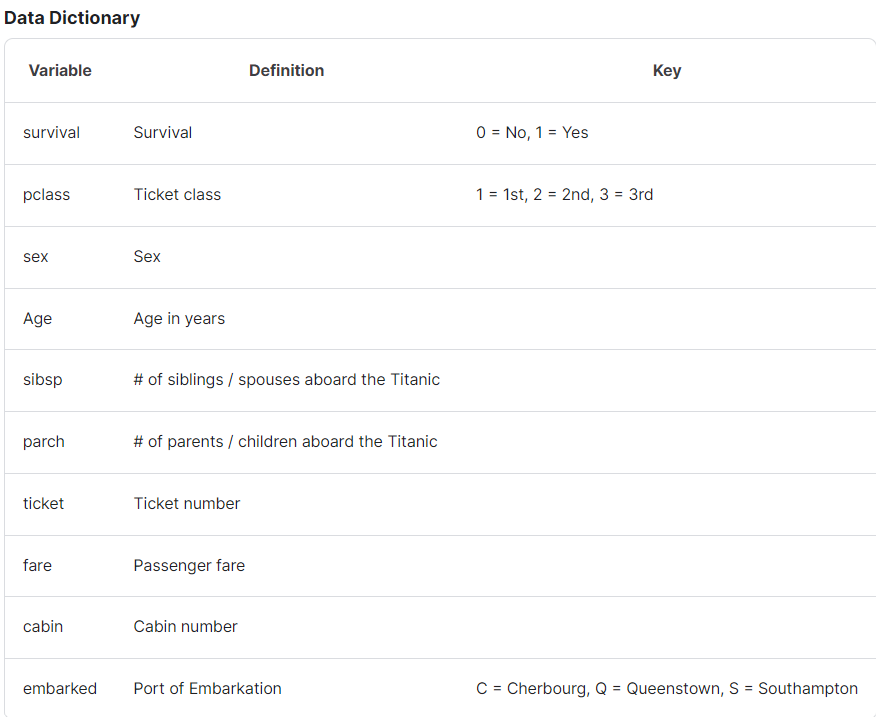

In [8]:
# number of Rows and Columns available in dataset
titanic_data.shape

(891, 12)

In [9]:
# There are total 12 columns out of which "Survival" column is a target column & remaning columns are feature columns

In [10]:
# Getting some more information about data

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **3. Data Cleaning Steps**

In [12]:
# Handling the missing values
# Drop the cabin column from the dataframe

titanic_data = titanic_data.drop(columns="Cabin",axis=1)

In [13]:
# replaceing the missing values in age column by the mean value

titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

In [14]:
# finding the mode value of "Embarked" column
print(titanic_data["Embarked"].mode()[0])

S


In [15]:
# Replacing the missing values in "Embarked" column with the mode value
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

In [16]:
# Againg checking the missing values in each column

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **4. Exploratory Data Analysis**

In [17]:
# Getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Finding the number of people survive and not survive
titanic_data["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

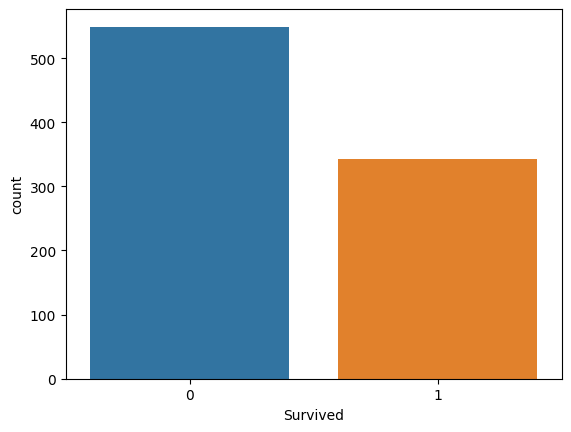

In [19]:
# Making a count plot for "Survived" column
sns.countplot(x='Survived',data=titanic_data)

In [20]:
# Finding the number of males & females available on ship
titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

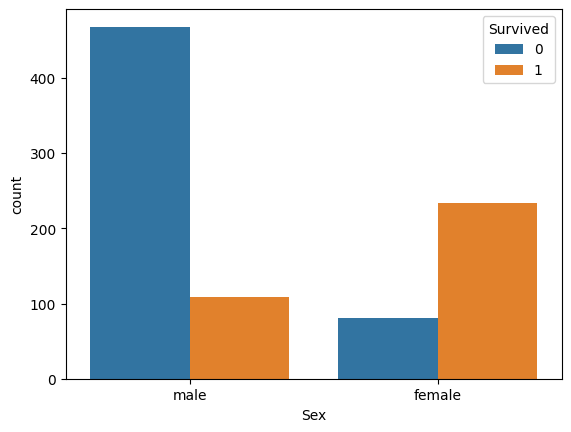

In [21]:
# Number of survivors Gender Wise
sns.countplot(x='Sex',hue="Survived",data=titanic_data)

**Observation_1** -- *The survior probability of female passangers is higher than male passangers.*

In [24]:
# Finding the number of 1st class, 2nd class & 3rd class passangers available on ship
titanic_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

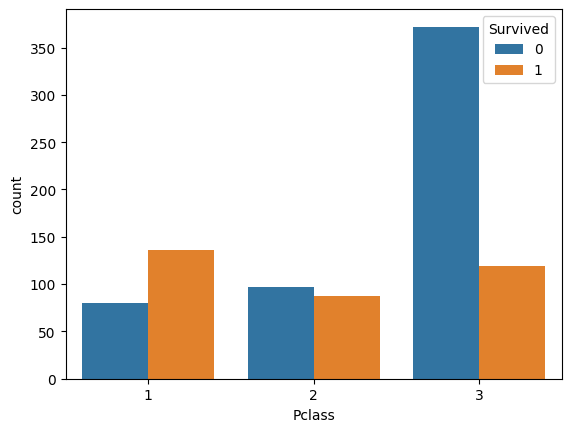

In [23]:
# Number of survivors Pclass Wise
sns.countplot(x='Pclass',hue="Survived",data=titanic_data)

**Observation_2** -- *The survior probability of 1st class passangers is higher than 2nd and 3rd class passangers.*

In [25]:
# Number Siblings/Spouses aboard on the ship
titanic_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

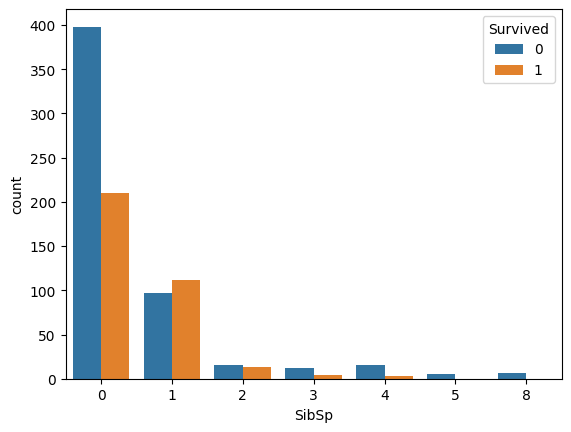

In [26]:
# Number of survivors Sibling/Spouse Count Wise
sns.countplot(x='SibSp',hue="Survived",data=titanic_data)

**Observation_3** -- *The survior probability is higher for the passangers who had a zero or one sibling/spouse on board.*

In [28]:
# Number Parents/Childerns aboard on the ship
titanic_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

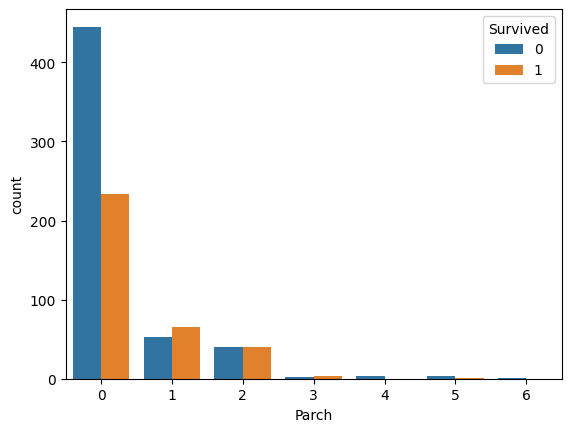

In [29]:
# Number of survivors Parent/Childern Count Wise
sns.countplot(x='Parch',hue="Survived",data=titanic_data)

**Observation_4** -- *The survior probability is higher for the passangers who had a zero or one Parent/Childern on board.*

In [31]:
# Port of embarkation wise passanger count
titanic_data["Embarked"].value_counts()

#S = Southhampton
#C = Cherbourg
#Q = Queenstown

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

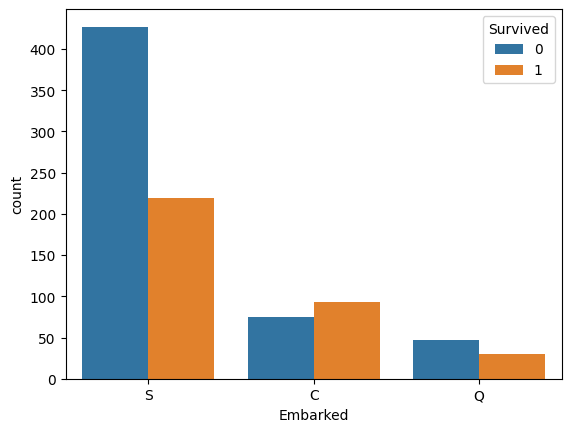

In [32]:
# Number of survivors port of embarkation Wise
sns.countplot(x='Embarked',hue="Survived",data=titanic_data)

**Observation_5** -- *The survior probability is higher for the passangers who had embarked on the ship from "Southhampton" and "Cherbourg".*

# **5. Data Processing**

In [35]:
# converting categorical data values into numerical data values

titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [36]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [39]:
# Seprating Features(X) and Target(Y) columns
# We will remove some columns which are not useful as a features

X = titanic_data.drop(columns=['Name','Ticket','PassengerId','Survived'],axis=1)
Y = titanic_data['Survived']

In [42]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [43]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [44]:
# Splitting the dataset into traning and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [45]:
print(X.shape,X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


# **5. Training And Evaluating Machine Learning Model**

In [59]:
# I am using Logistic Regression Model here because it is appropriate for binary classification

model = LogisticRegression()

In [47]:
# traning the Logistic Regression Model with the traning data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Model Evaluation by calculating accuracy score
# Accuracy On Traning Data

X_train_prediction = model.predict(X_train)


In [49]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [54]:
traning_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of traning data: ', traning_data_accuracy)

Accuracy score of traning data:  0.8075842696629213


In [55]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)

In [57]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [61]:
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of testing data: ', test_data_accuracy)

Accuracy score of testing data:  0.7821229050279329


In [62]:
 # The accuracy score for Train and Test data is nearly equal & which is approximately equal to 80%.
 # Which concludes that, our model is good fit on test as well train dataset.
 # Our model is predicting survival of Titanic passengers with nearly 80% accuracy.

